[윤기태 / 패스트캠퍼스] 최종 수정일 : 2018. 02. 08

## 데이터 분석을 위한 파이썬 프로그래밍 CAMP - 9회차

### *개발 환경 및 사용 라이브러리*
- 개발환경 : OSX 10.13.2, Anaconda-spyder IDE
- 개발언어 : Python 3.6.1
- 사용모듈 : pandas, numpy, matplotlib

In [48]:
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [49]:
import pandas as pd

train = pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv")
test = pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv")

"""
여러가지 변수로 "Survived"(생존)을 예측하는 example
"""

# 데이터 & 결측치 확인
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
train.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25

In [51]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 범주형 변수를 수치형으로 변환
- Sex와 Embarked변수가 categorical 변수이기에 python에서 처리할 수 있도록 numerical 변수로 변환해주는 과정

In [52]:
# Age의 NaN값을 Age들의 평균으로 보정
train['Age'] = train['Age'].fillna(train['Age'].mean())

train.loc[train['Sex']=='male', 'Sex'] = 0
train.loc[train['Sex']=='female', 'Sex'] = 1

train.loc[train['Embarked']=='S', 'Embarked'] = 0
train.loc[train['Embarked']=='C', 'Embarked'] = 1
train.loc[train['Embarked']=='Q', 'Embarked'] = 2

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


### 피처 엔지니어링 없이 1차 학습

- 데이터 나누기 및 1차 feature selection, 결측 데이터 처리

In [53]:
from sklearn.model_selection import train_test_split

Train, Test = train_test_split(train,test_size=0.2,random_state=0)

# PassengerId, Name, Ticket은 Survived와 상관이 없는 변수이므로 제외
# Cabin변수 역시 NaN값이 너무 많으므로 제외

Train_X = Train.loc[: ,['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Train_Y = Train['Survived']

Test_X = Test.loc[: ,['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Test_Y = Test['Survived']

# Embarked의 NaN값을 최빈값으로 보정
Train_X['Embarked'] = Train_X['Embarked'].fillna(int(train['Embarked'].mode()))

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(Train_X, Train_Y)
y_pred = lr.predict(Test_X)

print("Misclassification samples : %d" %(Test_Y!=y_pred).sum())

Misclassification samples : 34


### 1차 학습 모델 평가

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
print("accuracy: %.2f" %accuracy_score(Test_Y, y_pred))
print("Precision : %.3f" % precision_score(Test_Y,y_pred))
print("Recall : %.3f" % recall_score(Test_Y,y_pred))
print("F1 : %.3f" % f1_score(Test_Y,y_pred))

accuracy: 0.81
Precision : 0.761
Recall : 0.739
F1 : 0.750


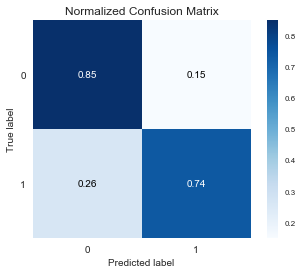

In [56]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(Test_Y, y_pred, normalize=True)
plt.show()

## Feature Engineering, Feature Selection 적용

- 변수 상관관계 확인

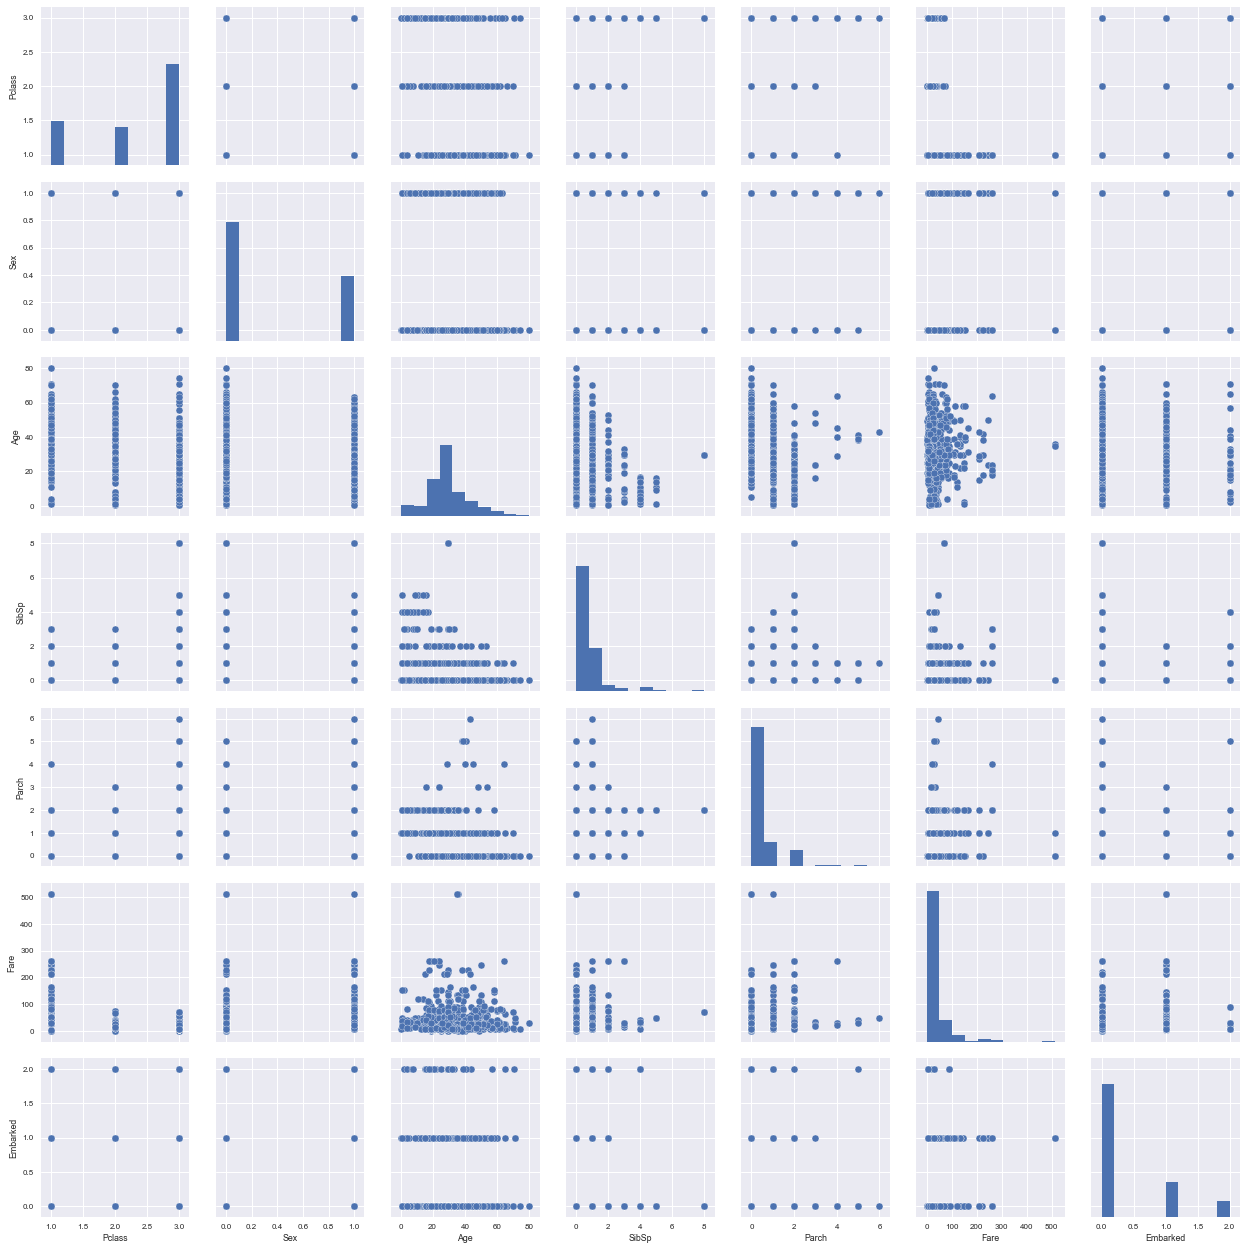

In [57]:
import seaborn as sns
import numpy as np

cols = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']
train.columns
sns.pairplot(train[cols])

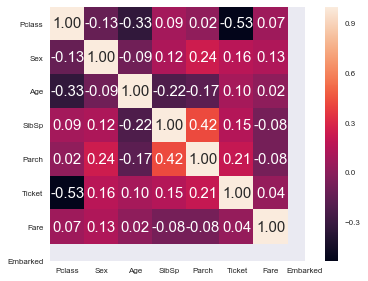

In [58]:
cm = np.corrcoef(Train_X.values.T)
sns.set(font_scale=0.8)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
plt.show()

---
***

- 집단 비교를 위한 새로운 피처 생성

In [59]:
train["royal"] = 0
train.loc[train['Fare'] > 10, 'royal'] = 1

train["Survived"][train["royal"] == 1].value_counts(normalize = True)

0    0.504505
1    0.495495
Name: Survived, dtype: float64

In [62]:

train["child"] = 0
train.loc[train['Age'] < 18, 'child'] = 1

train["Survived"][train["child"] == 1].value_counts(normalize = True)

1    0.539823
0    0.460177
Name: Survived, dtype: float64

In [75]:
# 가족 수 피처 생성 (SibSp : 사촌(가족) 수, Parch : 부모 자녀 수)
train["family_size"] = train["SibSp"] + train["Parch"] + 1

---

- cabin column의 NAN 핸들링

In [76]:
train['Cabin'].fillna(0, inplace=True)
train.loc[train['Cabin']!=0, 'Cabin'] = 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,royal,child,family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1,1,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0,1,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,0,0,1


### 피처 조정 후 다시 학습하기

In [77]:
from sklearn.model_selection import train_test_split

Train, Test = train_test_split(train,test_size=0.2,random_state=0)

# PassengerId, Name, Ticket은 Survived와 상관이 없는 변수이므로 제외

Train_X = Train.loc[: ,['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin', 'child', 'royal', 'family_size']]
Train_Y = Train['Survived']

Test_X = Test.loc[: ,['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin', 'child', 'royal', 'family_size']]
Test_Y = Test['Survived']

# Embarked의 NaN값을 최빈값으로 보정
Train_X['Embarked'] = Train_X['Embarked'].fillna(int(train['Embarked'].mode()))

- 마찬가지로 데이터 스케일링

In [78]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(Train_X)
X_train_std = sc.transform(Train_X)
X_train_std = pd.DataFrame(X_train_std)
X_train_std.columns = Train_X.columns

X_test_std = sc.transform(Test_X)
X_test_std = pd.DataFrame(X_test_std)
X_test_std.columns = Test_X.columns

- 잘못 분류된 샘플 개수 약 10% 감소

In [92]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, Train_Y)
y_pred = lr.predict(X_test_std)

print("Misclassification samples : %d" %(Test_Y!=y_pred).sum())

Misclassification samples : 30


---

- 분류모델 재평가 : 모든 수치 개선

In [93]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
print("accuracy: %.2f" %accuracy_score(Test_Y, y_pred))
print("Precision : %.3f" % precision_score(Test_Y,y_pred))
print("Recall : %.3f" % recall_score(Test_Y,y_pred))
print("F1 : %.3f" % f1_score(Test_Y,y_pred))

accuracy: 0.83
Precision : 0.775
Recall : 0.797
F1 : 0.786


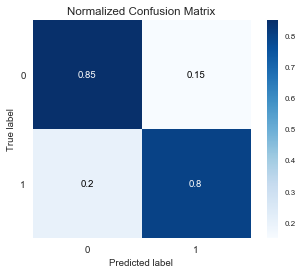

In [94]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(Test_Y, y_pred, normalize=True)
plt.show()

---

- 동일 모델 파라미터 조정 : 결과 악화

In [96]:
lr = LogisticRegression(penalty='l2', C=0.1)
lr.fit(X_train_std, Train_Y)
y_pred = lr.predict(X_test_std)

print("Misclassification samples : %d" %(Test_Y!=y_pred).sum())

Misclassification samples : 33


In [97]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
print("accuracy: %.2f" %accuracy_score(Test_Y, y_pred))
print("Precision : %.3f" % precision_score(Test_Y,y_pred))
print("Recall : %.3f" % recall_score(Test_Y,y_pred))
print("F1 : %.3f" % f1_score(Test_Y,y_pred))

accuracy: 0.82
Precision : 0.757
Recall : 0.768
F1 : 0.763


### 추가적인 분류 모델 검증

#### Decision Tree

In [103]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_std, Train_Y)
y_pred = clf.predict(X_test_std)

print("Misclassification samples : %d" %(Test_Y!=y_pred).sum())

Misclassification samples : 37


In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
print("accuracy: %.2f" %accuracy_score(Test_Y, y_pred))
print("Precision : %.3f" % precision_score(Test_Y,y_pred))
print("Recall : %.3f" % recall_score(Test_Y,y_pred))
print("F1 : %.3f" % f1_score(Test_Y,y_pred))

accuracy: 0.79
Precision : 0.767
Recall : 0.667
F1 : 0.713


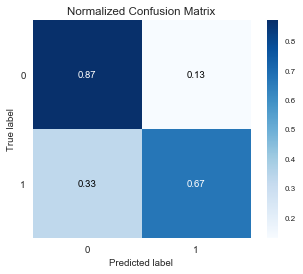

In [105]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(Test_Y, y_pred, normalize=True)
plt.show()

---

- 동일 모델 파라미터 조정 : 결과 개선

In [106]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train_std, Train_Y)
y_pred = clf.predict(X_test_std)

print("Misclassification samples : %d" %(Test_Y!=y_pred).sum())

Misclassification samples : 32


In [107]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
print("accuracy: %.2f" %accuracy_score(Test_Y, y_pred))
print("Precision : %.3f" % precision_score(Test_Y,y_pred))
print("Recall : %.3f" % recall_score(Test_Y,y_pred))
print("F1 : %.3f" % f1_score(Test_Y,y_pred))

accuracy: 0.82
Precision : 0.785
Recall : 0.739
F1 : 0.761


#### Random Forest Classifier

- accuracy, precision은 높지만 F1 스코어가 다소 낮음

In [119]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=3, random_state=0)
clf_rf.fit(X_train_std, Train_Y)
print(clf_rf.feature_importances_)

Y_test_pred_rf = clf_rf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(Test_Y, Y_test_pred_rf))

[ 0.15323663  0.3858894   0.03501762  0.01362378  0.0156117   0.17647716
  0.01069502  0.13522401  0.02661815  0.01834429  0.02926223]
Accuracy: 0.82


In [120]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
print("accuracy: %.2f" %accuracy_score(Test_Y, Y_test_pred_rf))
print("Precision : %.3f" % precision_score(Test_Y,Y_test_pred_rf))
print("Recall : %.3f" % recall_score(Test_Y,Y_test_pred_rf))
print("F1 : %.3f" % f1_score(Test_Y,Y_test_pred_rf))

accuracy: 0.82
Precision : 0.878
Recall : 0.623
F1 : 0.729


##### 변수 중요도와 그래프를 통하여, 어떤 변수가 중요한 지 확인 가능.

In [127]:
feat_labels = X_train_std.columns.values
clf_rf = RandomForestClassifier(max_depth=3, random_state=0)
clf_rf.fit(X_train_std, Train_Y)
importances = clf_rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train_std.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Sex                            0.385889
 2) Fare                           0.176477
 3) Pclass                         0.153237
 4) Cabin                          0.135224
 5) Age                            0.035018
 6) family_size                    0.029262
 7) child                          0.026618
 8) royal                          0.018344
 9) Parch                          0.015612
10) SibSp                          0.013624
11) Embarked                       0.010695


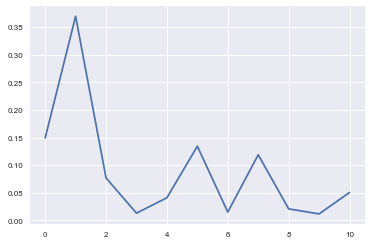

In [109]:
plt.plot(clf_rf.feature_importances_)

## 교차검증

- 선택한 모델은 로지스틱 분류 모델로, 교차검증으로 오버피팅 검증 
- 결론 : 오버피팅의 가능성은 매우 낮음

In [132]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, Train_Y)
y_pred = lr.predict(X_test_std)

print("accuracy: %.2f" %accuracy_score(Test_Y, y_pred))

accuracy: 0.83


In [133]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train_std, Train_Y, cv=10)
print(scores)

[ 0.79166667  0.75        0.84722222  0.78873239  0.77464789  0.76056338
  0.78873239  0.78873239  0.84507042  0.8       ]
